In [99]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model slection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Other
from scipy import stats
import math
import pickle

In [100]:
import numpy as np
import pandas as pd

In [101]:
# import the data
df_train = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ShaniPillay/regression-apples-predict-api-template/main/utils/data/test_data.csv')


In [103]:
test_ID = df_test['Index']

In [104]:
df_test = df_test.drop('Index', axis=1) # drop index for the test data, train data doesnt have index

In [105]:
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [106]:
df_test.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [107]:
df_test.shape

(685, 12)

In [108]:
df_train.shape

(64376, 13)

In [109]:
train=df_train.loc[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [110]:
test=df_test.loc[df_test['Commodities'] == 'APPLE GOLDEN DELICIOUS']

In [111]:
test.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [112]:
train.shape,test.shape

((1952, 13), (685, 12))

In [113]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [114]:
train.drop(['Commodities','Date'], axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)

C:\Users\t1mad\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55


C:\Users\t1mad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

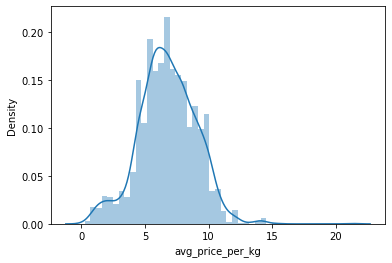

In [116]:
# target distribution
sns.distplot(train['avg_price_per_kg'],kde=True)

Data is normally distributed

### Dummy Variable Encoding

In [117]:
### START FUNCTION
def dummy_encode_titles(input_df):
    temp_df = input_df.copy()
    
    # Apply Dummy Encoding 
    temp_df = pd.get_dummies(temp_df, columns=['Province','Container','Size_Grade'], drop_first=True)
    
    return temp_df
### END FUNCTION

In [118]:
train_withDummy=dummy_encode_titles(train)

In [119]:
train_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,0,0,1,0,0,0


In [120]:
train_withDummy.shape

(1952, 33)

## Correlation and Variable Selection

In [121]:
column_titles = [col for col in train_withDummy.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
train_withDummy=train_withDummy.reindex(columns=column_titles)

In [122]:
# Target correlations with features
corrs = pd.DataFrame(train_withDummy.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028
Total_Qty_Sold,0.087536


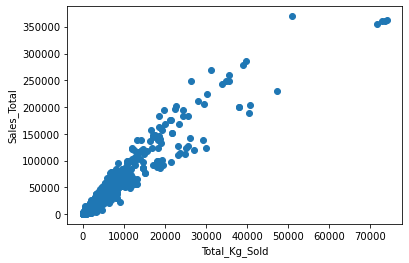

In [123]:
plt.scatter(train_withDummy['Total_Kg_Sold'],train_withDummy['Sales_Total'])
plt.ylabel("Sales_Total")
plt.xlabel("Total_Kg_Sold")
plt.show()

### Making Predictions

In [124]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [125]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = train_withDummy['avg_price_per_kg']
y.shape

(1952,)

In [126]:
# fit the model to the data and make predictions -Container_M4183
X = train_withDummy['Container_M4183'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.065617561699141,
 'Train R^2': 0.17226587611781274,
 'Test RMSE': 2.026090611603195,
 'Test R^2': 0.11531344644437602}

In [127]:
# fit the model to the data and make predictions - all features
X = train_withDummy.drop('avg_price_per_kg',axis=1).values  #df.drop(['B', 'C'], axis=1)
y = train_withDummy['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.3966967159055095,
 'Train R^2': 0.6215615552153039,
 'Test RMSE': 1.443006679273202,
 'Test R^2': 0.5512459503187024}

In [128]:
 train_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,0,0,0,0,0,0,0,0,8.51
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.55


## Predicting on the test set

### Preprocessing

In [129]:
 train_withDummy.shape,df_test.shape

((1952, 33), (685, 12))

In [130]:
test.drop(['Commodities','Date'], axis=1, inplace=True) #df.drop(['B', 'C'], axis=1)

In [131]:
test_withDummy=dummy_encode_titles(test)

In [132]:
test_withDummy.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
#check missing values
test_withDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 684
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Weight_Kg                      685 non-null    float64
 1   Low_Price                      685 non-null    float64
 2   High_Price                     685 non-null    float64
 3   Sales_Total                    685 non-null    float64
 4   Total_Qty_Sold                 685 non-null    int64  
 5   Total_Kg_Sold                  685 non-null    float64
 6   Stock_On_Hand                  685 non-null    int64  
 7   Province_EASTERN CAPE          685 non-null    uint8  
 8   Province_NATAL                 685 non-null    uint8  
 9   Province_ORANGE FREE STATE     685 non-null    uint8  
 10  Province_TRANSVAAL             685 non-null    uint8  
 11  Province_W.CAPE-BERGRIVER ETC  685 non-null    uint8  
 12  Province_WEST COAST            685 non-null    uin

### Making predictions

In [134]:
preds = model.predict(test_withDummy)

In [135]:
preds

array([ 8.79713633,  9.13176344,  8.26845318,  8.03636658,  8.4938694 ,
        5.35024611,  5.36630695,  7.83973058,  8.85010634,  9.01953286,
        6.63552702,  6.65276073,  8.64555173,  5.26436706,  3.13751913,
        6.8547154 ,  7.6953196 ,  5.13600176,  9.40025777,  6.1908324 ,
        5.38154645,  4.91263346,  6.2871737 ,  6.67128767,  4.99927293,
        6.63841359,  7.65184318,  8.32683569,  8.56159956,  7.75226776,
        8.88538432,  5.08032918,  9.20810493,  7.61826805,  4.05074493,
        8.6749488 ,  8.36005633,  9.58002883,  5.92805409,  6.64857412,
        8.81875025,  8.53770697,  8.81302407,  5.10042403,  6.13263507,
        6.35585489,  4.18812905,  6.50801852,  6.08632382,  2.82957659,
        0.58919172,  5.09562489,  8.92322398,  8.70542768,  7.89046302,
        7.03368291,  8.32740517,  9.26702676,  9.03373091,  8.30975877,
        8.94788451,  9.59150056,  4.71814392,  8.11199661,  7.83290014,
        5.79057093,  5.10341916,  4.86529097,  6.52547078,  6.42

### Submission

In [136]:
# create submission dataframe

submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': preds
    })

In [137]:
submission

,Index,avg_price_per_kg
0,1,8.797136
1,2,9.131763
2,3,8.268453
3,4,8.036367
4,5,8.493869
...,...,...
680,681,6.000626
681,682,8.354621
682,683,6.001845
683,684,7.430270


In [138]:
# save DataFrame to csv file for submission
submission.to_csv("ZM2_theFirst.csv", index=False)